In [ ]:
from neural.containers import Sequential
from neural.losses import MSE, CE
from neural.layers import Dense, TanH, RELU, Softmax
from neural.utils.preprocessing import OneHotEncoder
import datasets.spiral_data as sd 
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 
from neural.utils.visualization import plot_decision_2d

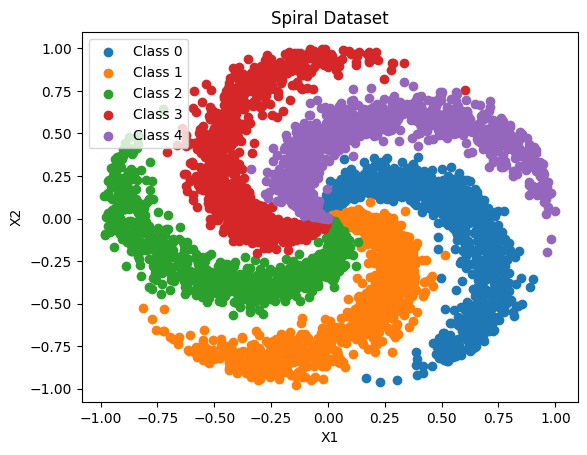

In [2]:
num_classes = 5
(x, y) = sd.generate_spiral_data(n_samples=1000, n_class=num_classes, noise=.2)
sd.plot_spiral(x,y,num_classes)

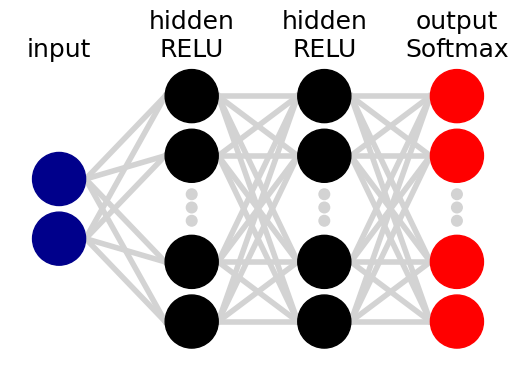

In [3]:
model = Sequential([
    Dense(2, 12),
    RELU(),
    Dense(12, 8),
    RELU(),
    Dense(8, num_classes),
    Softmax()
])

model.display_network()

In [4]:
# encode the y's
encoder = OneHotEncoder()
encoder.fit(y)
y_encoded = encoder.encode(y)
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=.2)

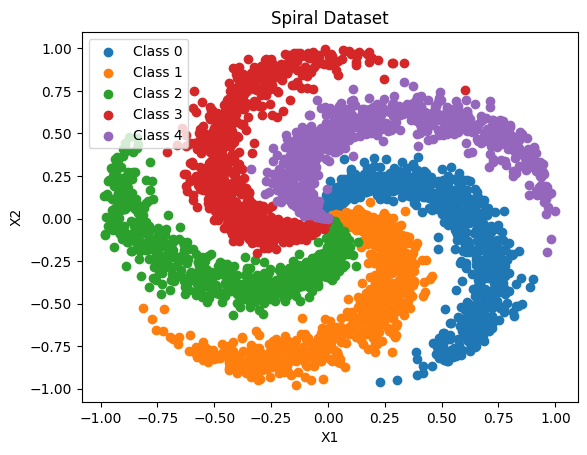

In [5]:
sd.plot_spiral(X_train, encoder.decode(y_train), num_classes=num_classes)

In [6]:
model.fit(X_train, y_train, 200, .01, CE(), accuracy='categorical')
y_pred = encoder.decode(model.predict(X_test))
y_act = encoder.decode(y_test)

Epoch 0/200, Loss: 1.1405, Accuracy: 0.4803


KeyboardInterrupt: 

In [7]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_act = np.argmax(y_test, axis=1)
accuracy = sum(y_pred == y_act) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.954


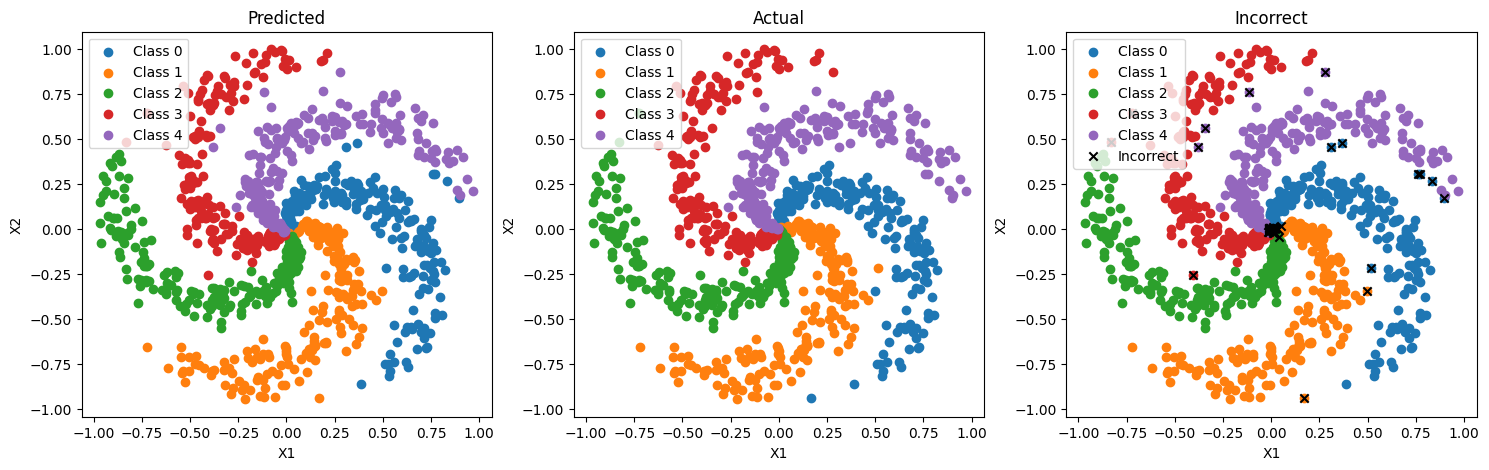

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax = ax.flatten()


sd.plot_spiral(X_test, y_pred, num_classes, title="Predicted", ax=ax[0], render=False)
sd.plot_spiral(X_test, y_act, num_classes, title="Actual", ax=ax[1], render=False)
sd.plot_spiral(X_test, y_pred, num_classes, title="Incorrect", correct=y_act, ax=ax[2], render=False)
plt.show()

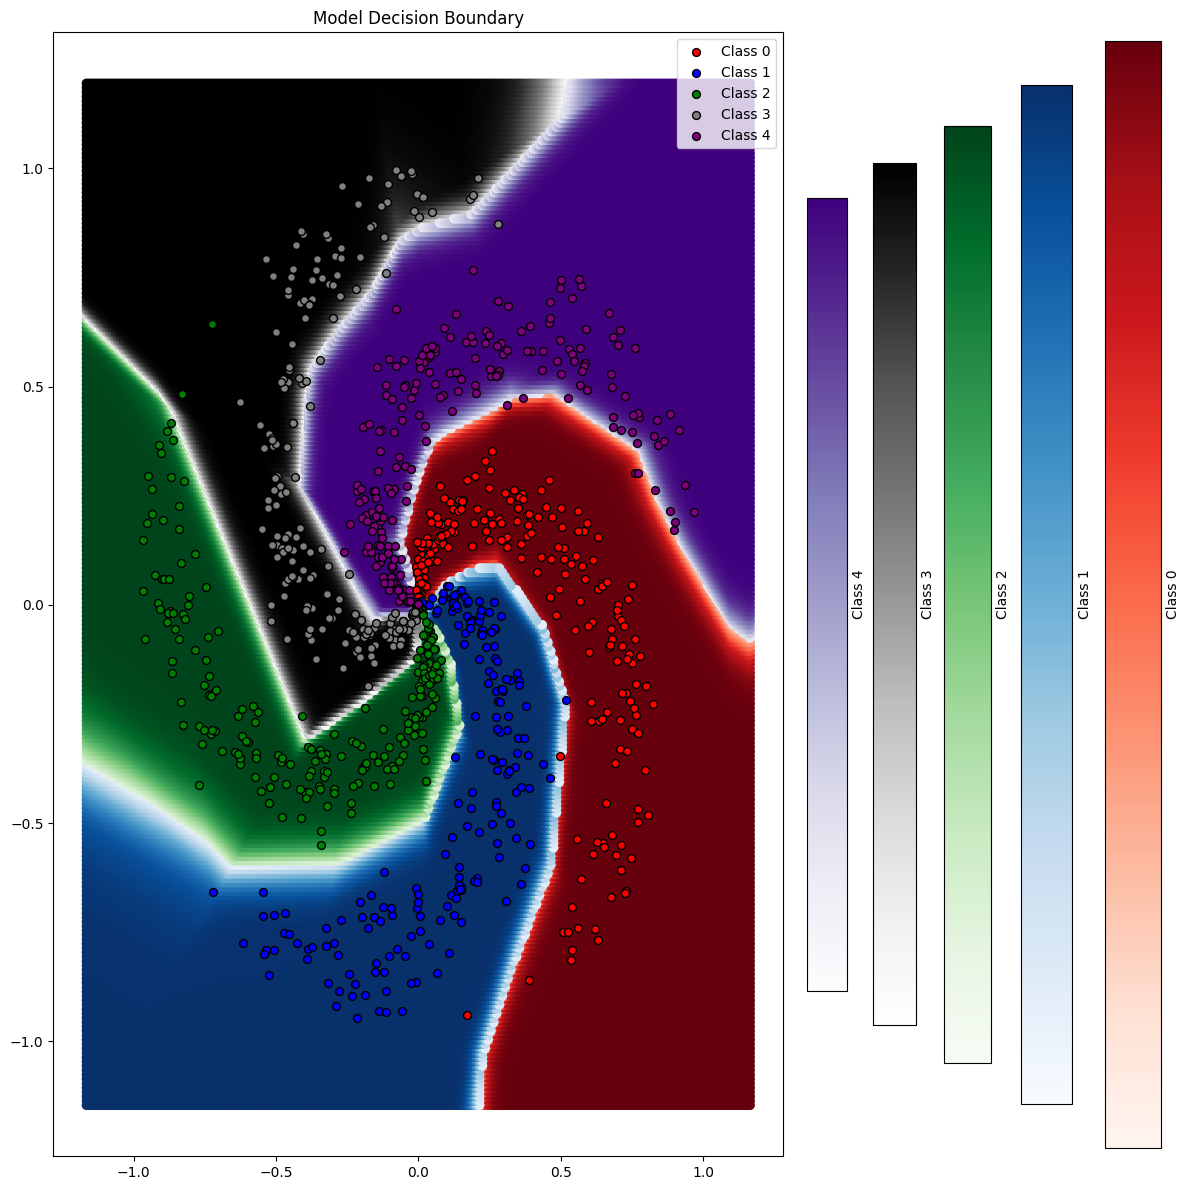

In [9]:
plt.figure(figsize=(12,12))
plot_decision_2d(model, X_test, y_test)

TypeError: Colorbar.__init__() got an unexpected keyword argument 'fontsize'

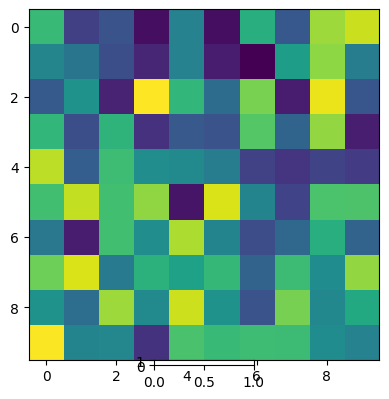

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample plot
data = np.random.rand(10, 10)

plt.imshow(data, cmap='viridis')
plt.colorbar(label='Class 1', shrink=.2, pad=.001, fraction=.05, orientation='horizontal', ticks=[], fontsize=4)
plt.colorbar(label='Class 2', shrink=.2, pad=.001, fraction=.05, orientation='horizontal', ticks=[])
plt.colorbar(label='Class 3', shrink=.2, pad=.001, fraction=.05, orientation='horizontal', ticks=[])
plt.show()


In [10]:
print(x)

[[ 0.00000000e+00  0.00000000e+00]
 [-2.64315015e-04  9.65474276e-04]
 [-1.64469083e-04  1.99523481e-03]
 ...
 [ 9.88158126e-01  1.39798144e-01]
 [ 9.23962662e-01  3.79857866e-01]
 [ 8.21884036e-01  5.69654835e-01]]
